In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/work/SyncVR-EDA/data/Derelict_Vehicle_Dispositions_-_Vehicles.csv')

In [3]:
df

,ISN,DVV_DISTRICT_CD,DVV_TAG_LOC1,DVV_TAG_LOC2,DVV_YEAR,DVV_MAKE,DVV_TYPE,DVV_COLOR,DVV_TAG_REMARKS,DVV_TAG_NO,...,DVV_TIMESTMP,DVV_CHECKED_DATE,DVV_TIMESTMP_UPD,DVV_FINAL_DISP_DATE,DVV_FINAL_DISP_CD,DVV_SE_STATUS,DVV_CITY,DVV_STATE,DVV_STOLEN_INDIC,DVV_DOT
0,1648,QN07,N/S 41 AVE BET MAIN ST &,COLLEGE PT BLVD,1984.0,MERCUR,4D,RED,CVDASH#EK652957 NOB/UNICB,4109185,...,19950905105015,19950906.0,1.995101e+13,19950906,RTC,N,NaN,NaN,NaN,NaN
1,1649,QW03,W/S 38 AVE BET 108 & 111,NaN,1978.0,FORD,2D,BROWN,NaN,391103,...,19891221082938,19891221.0,NaN,19891221,RTC,NaN,NaN,NaN,NaN,NaN
2,1650,QW01,IN LOT 14ST AND 34ST,NaN,1982.0,NISSAN,2D,GREY,NaN,391252,...,19891221083043,19891221.0,NaN,19891221,RTC,NaN,NaN,NaN,NaN,NaN
3,1651,QW03,S/S 39 AVE BET 112 & 111,STREET,1980.0,TOYOTA,2D,GREY,NaN,391104,...,19891221083510,19891221.0,NaN,19891221,RTC,NaN,NaN,NaN,NaN,NaN
4,1652,QW03,W/S 91 STREET BET 35 & 34,AVE,1982.0,DODGE,4D,GREY,NaN,391105,...,19891221083709,19891221.0,NaN,19891221,RTC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688761,688738,SI02,78 WINDOM AVE,BET ROBIN RD AND CEDAR AV,NaN,BUICK,4D,MAROON,MAY RELOC. DUE TO MILLING,5030406,...,20190906121745,NaN,NaN,99999999,AAA,B,NaN,NaN,NaN,NaN
688762,688739,BXE10,R/S LAFAYETTE AVE BTW,CROSS BX EXWY & HUTCHINSO,NaN,CHEVRO,PT,BLACK,NaN,2230448,...,20190906122335,NaN,NaN,99999999,AAA,B,NaN,NaN,NaN,NaN
688763,688740,QN07,I/F/O 33 49 161 ST B/W,33 AVE &35 AVE,NaN,INFINT,4D,GRAY,NaN,4226661,...,20190906124324,NaN,NaN,99999999,AAA,B,NaN,NaN,NaN,NaN
688764,688741,SI02,1435 TRAVIS AVE,VICTORYBLVD- SOUTH AVE,NaN,PIONEE,TR,WHITE,RV TRAILER IN PARKING LOT,5033206,...,20190906130007,NaN,NaN,99999999,AAA,B,NaN,NaN,NaN,NaN


In [4]:
#Renaming all the columns to remove redundant 'DVV_' prefix
rename = {}
for i in df.columns.values:
    if i == 'ISN':
        rename[i]=i
    else:
        rename[i] = i[4:]


In [5]:
df.rename(columns = rename, inplace=True)

In [6]:
#Checking nan perentages by column
df.isna().mean()

ISN                0.000000
DISTRICT_CD        0.000000
TAG_LOC1           0.000003
TAG_LOC2           0.241994
YEAR               0.284409
MAKE               0.010382
TYPE               0.000000
COLOR              0.000000
TAG_REMARKS        0.611722
TAG_NO             0.000000
TAG_DATE           0.000000
TAG_TIME           0.000000
TIMESTMP           0.000000
CHECKED_DATE       0.265145
TIMESTMP_UPD       0.010448
FINAL_DISP_DATE    0.000000
FINAL_DISP_CD      0.000000
SE_STATUS          0.150388
CITY               0.781482
STATE              0.781486
STOLEN_INDIC       0.920548
DOT                0.920548
dtype: float64

In [7]:
#Cropping district codes to cover a larger area
df['DISTRICT_CD'] = df['DISTRICT_CD'].apply(lambda x: x[:-2])

In [8]:
#Changing stolen indicator from nan and 'Y' to True and False
df['STOLEN_INDIC'] = df['STOLEN_INDIC'].map({np.nan: False, 'Y': True})

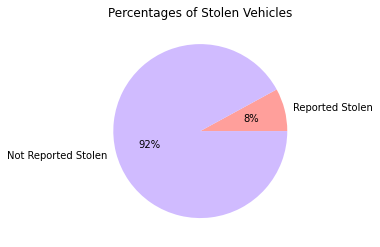

In [9]:
stolen_pct = df['STOLEN_INDIC'].mean()

labels = ['Reported Stolen', 'Not Reported Stolen']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[3:5]

#create pie chart
plt.pie([stolen_pct,1-stolen_pct], labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentages of Stolen Vehicles')
plt.show()

In [10]:
#Changing the timestamp ints to datetime objects
df['TIMESTMP'] = pd.to_datetime(df['TIMESTMP'],format = '%Y%m%d%H%M%S', errors='coerce')

Text(0.5, 1.0, 'Top NY Districts with Derelict Cars')

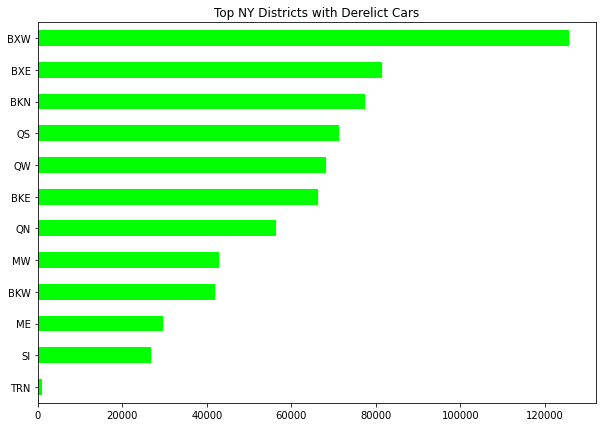

In [11]:
df['DISTRICT_CD'].value_counts()[-3::-1].plot(kind='barh', color = 'lime', figsize = (10,7))
plt.title('Top NY Districts with Derelict Cars')

Grouping by districts, we can see that the most abandoned cars are found in Bronx West, Bronx East, Brooklyn North, Queens South, and so on.

In [12]:
#Formatting the TAG_TIME column to be of datetime object
df['TAG_TIME'] = pd.to_datetime(df['TAG_TIME'], format = '%H%M', errors='coerce')

Text(0.5, 0, 'Hour of the Day')

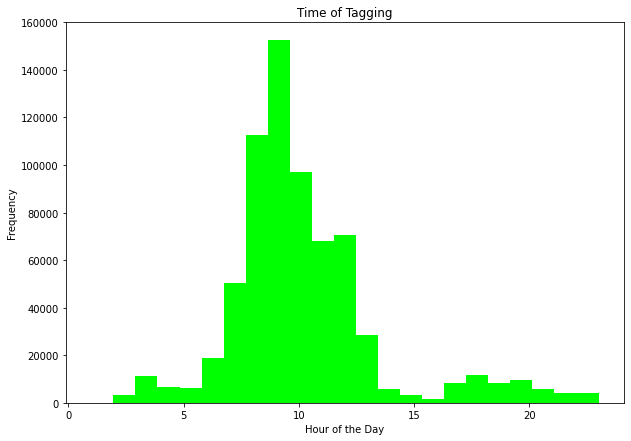

In [13]:
df['TAG_TIME'].apply(lambda x: x.hour).plot(kind = 'hist', bins = 23, color = 'lime', figsize = (10,7))
plt.title('Time of Tagging')
plt.xlabel('Hour of the Day')

It appears that most derelict cars are tagged between the hours of 7am and 1pm and drop significantly during 2pm to 6am.

Text(0.5, 1.0, 'Most Abandoned Car Makes')

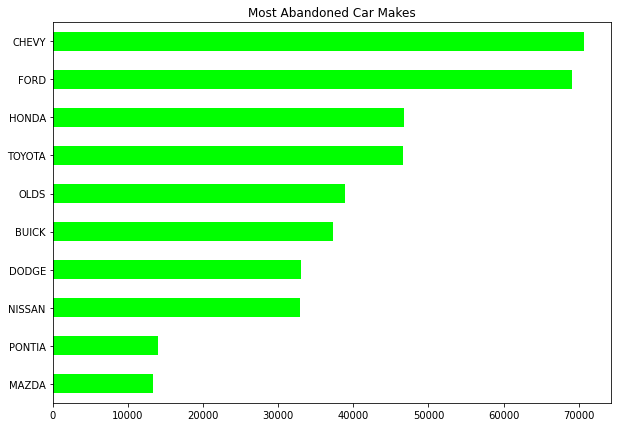

In [14]:
df['MAKE'].value_counts()[:10][::-1].plot(kind = 'barh', color = 'lime', figsize = (10,7))
plt.title('Most Abandoned Car Makes')

Text(0.5, 1.0, 'Most Abandoned Car Types')

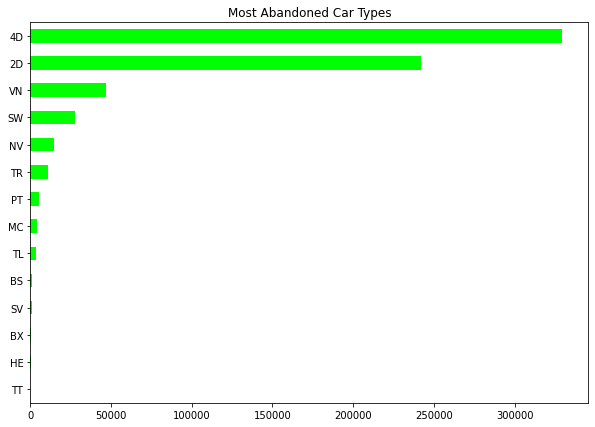

In [15]:
df['TYPE'].value_counts()[::-1].plot(kind = 'barh', color = 'lime', figsize = (10,7))
plt.title('Most Abandoned Car Types')

The most abandoned car types are 4 door, 2 door, and vans.

Text(0.5, 1.0, 'Most Abandoned Car Colors')

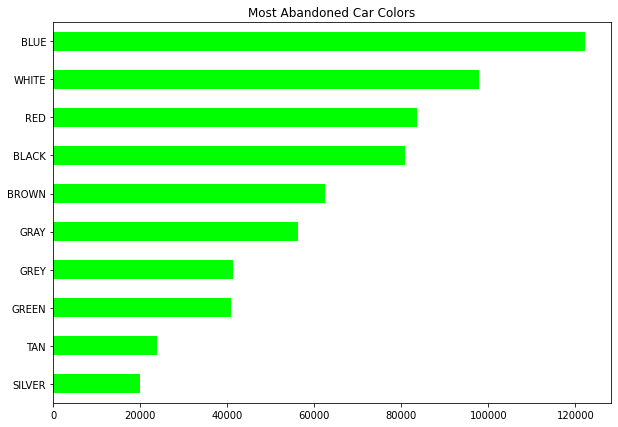

In [16]:
df['COLOR'].value_counts()[:10][::-1].plot(kind = 'barh', color = 'lime', figsize = (10,7))
plt.title('Most Abandoned Car Colors')

In [17]:
#Calculate the age of the vehicle
df['CAR_AGE'] = df['TIMESTMP'].apply(lambda x: x.year) - df['YEAR']

In [18]:
#These are the outlier cars that have mis-entered information on the year
df[(df['CAR_AGE'] > 70) | (df['CAR_AGE'] < -1)]

,ISN,DISTRICT_CD,TAG_LOC1,TAG_LOC2,YEAR,MAKE,TYPE,COLOR,TAG_REMARKS,TAG_NO,...,CHECKED_DATE,TIMESTMP_UPD,FINAL_DISP_DATE,FINAL_DISP_CD,SE_STATUS,CITY,STATE,STOLEN_INDIC,DOT,CAR_AGE
5782,7429,TRN,3RD AVE BETW 2ND AND 3RD,STREETS,1995.0,DATSUN,2D,YELLOW,ENGINE VIN,9000022,...,19990219.0,1.999022e+13,19990219,RTC,A,NaN,NaN,False,NaN,-5.0
657382,656631,BKE,R/S MAPLE ST,TROY X SCHNECTEDY,-6666.0,INTERN,BS,YELLOW,SCHOOL BUS,3216557,...,NaN,2.015103e+13,20151026,OC,B,NaN,NaN,False,NaN,8681.0


In [19]:
#Lets get rid of this anomaly
df = df[(df['CAR_AGE'] < 70) & (df['CAR_AGE'] >= -1)]

Text(0.5, 1.0, 'Abandoned Cars by Year Tagged in New York City')

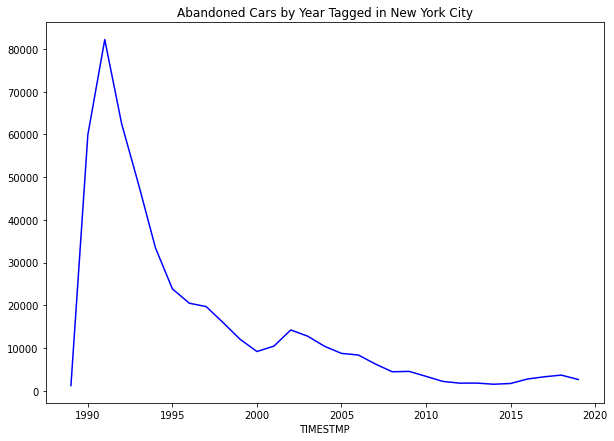

In [20]:
df.groupby([df['TIMESTMP'].dt.year]).count()['ISN'].plot(color = 'b', figsize = (10,7));
plt.title('Abandoned Cars by Year Tagged in New York City')

In [37]:
df.groupby([df['TIMESTMP'].dt.year]).count()['ISN']

TIMESTMP
1989     1198
1990    59905
1991    82203
1992    62464
1993    48286
1994    33420
1995    23827
1996    20471
1997    19674
1998    15918
1999    12030
2000     9159
2001    10410
2002    14202
2003    12748
2004    10377
2005     8720
2006     8332
2007     6240
2008     4417
2009     4505
2010     3339
2011     2154
2012     1747
2013     1762
2014     1497
2015     1668
2016     2715
2017     3242
2018     3632
2019     2611
Name: ISN, dtype: int64

Text(0.5, 1.0, 'Abandoned Cars by Car Manufactured Year in New York City')

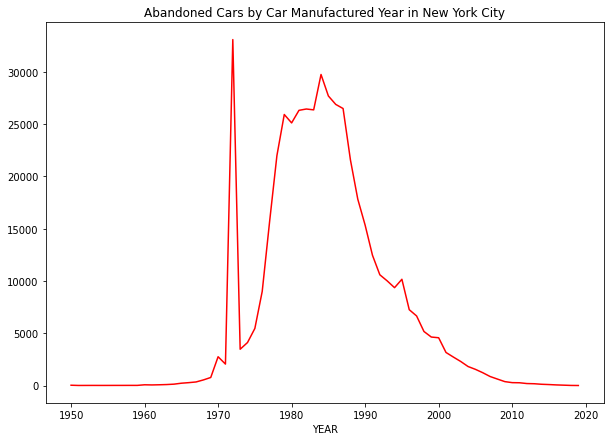

In [21]:
df.groupby('YEAR').count()['ISN'].plot(color = 'r', figsize = (10,7));
plt.title('Abandoned Cars by Car Manufactured Year in New York City')

There seems to be a huge amount of 1972 derelict cars. Quite the strange anomaly.

Text(0.5, 1.0, 'Most Abandoned Car Brands in 1972')

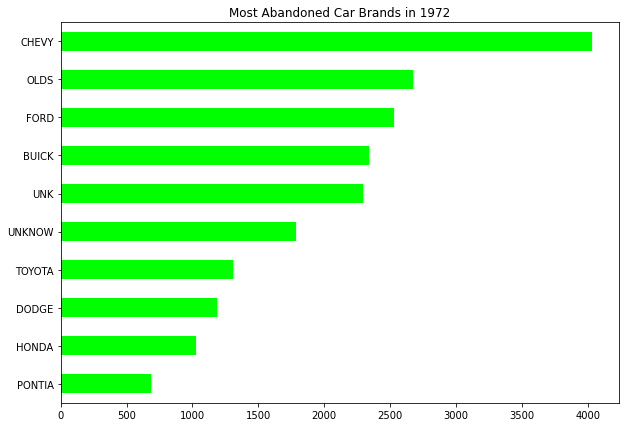

In [22]:
"df[df['YEAR'] == 1972]['MAKE'].value_counts()[:10][::-1].plot(kind = 'barh', color = 'lime', figsize = (10,7))
plt.title('Most Abandoned Car Brands in 1972')

Text(0.5, 1.0, 'Top 10 Most Abandoned Make Per Year')

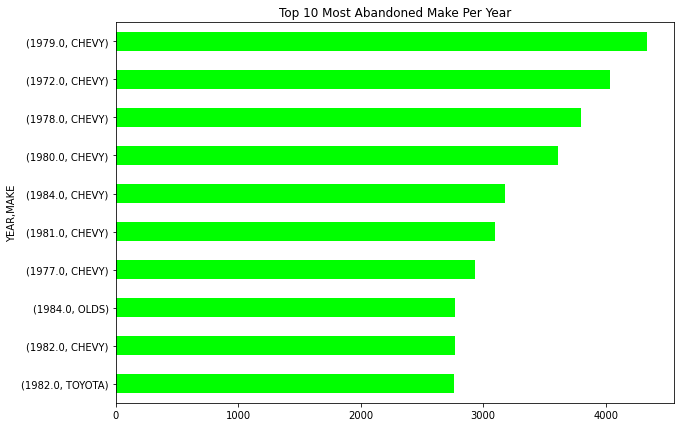

In [23]:
df.groupby(['YEAR','MAKE']).count()['ISN'].sort_values(ascending = False)[:10][::-1].plot(kind = 'barh', color = 'lime', figsize = (10,7))
plt.title('Top 10 Most Abandoned Make Per Year')

Text(0.5, 1.0, 'Top 10 Most Abandoned Cars (Characteristics)')

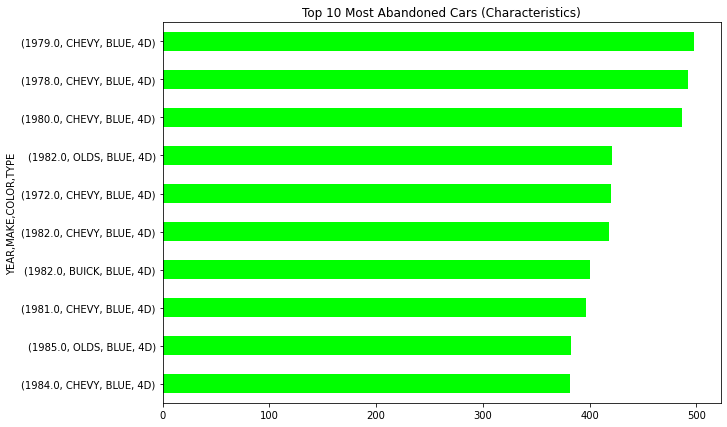

In [35]:
df.groupby(['YEAR','MAKE','COLOR','TYPE']).count()['ISN'].sort_values(ascending = False)[:10][::-1].plot(kind = 'barh', color = 'lime', figsize = (10,7))
plt.title('Top 10 Most Abandoned Cars (Characteristics)')

Text(0.5, 1.0, 'Age of All Derelict Cars')

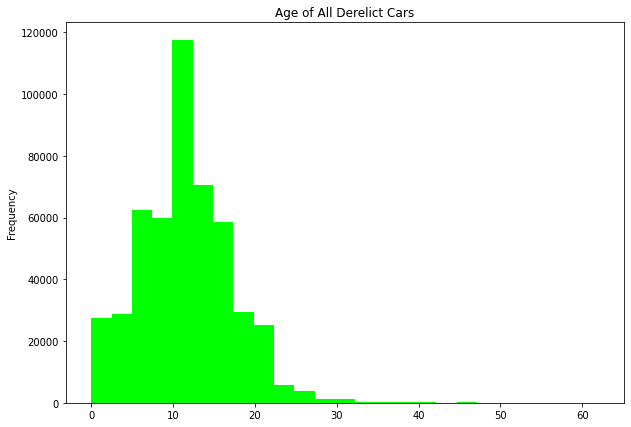

In [24]:

df[(df['CAR_AGE']<70) & (df['CAR_AGE']>-1)]['CAR_AGE'].plot(kind = 'hist', bins = 25, color = 'lime', figsize = (10,7))
plt.title('Age of All Derelict Cars')

Text(0.5, 1.0, 'Age of Stolen Derelict Cars')

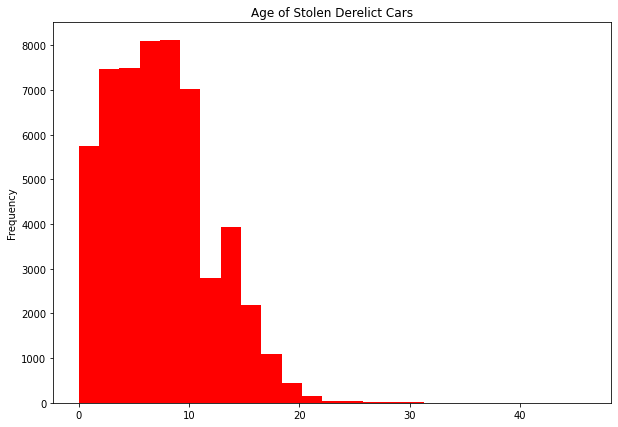

In [25]:
df[(df['CAR_AGE']<70) & (df['CAR_AGE']>-1) & df['STOLEN_INDIC']]['CAR_AGE'].plot(kind = 'hist', bins = 25, color = 'r', figsize = (10,7))
plt.title('Age of Stolen Derelict Cars')

The insight we see from these two graphs is that newer cars are the ones being stolen then abandoned while older cars (around 12+ years old) are being dumped without ever being reported as stolen. Let us confirm this with some bootstrapping.

In [26]:
top10 = df.groupby(['MAKE']).count()['ISN'].sort_values(ascending = False)[:10].index.values

In [27]:
top10df = df[df['MAKE'].isin(top10)]

Text(0.5, 1.0, 'Derelict Car Age Distribution')

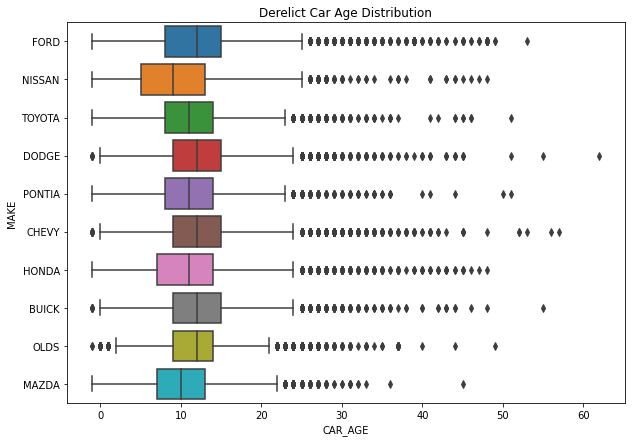

In [28]:
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x = 'CAR_AGE', y = 'MAKE', data = top10df)
plt.title('Derelict Car Age Distribution')

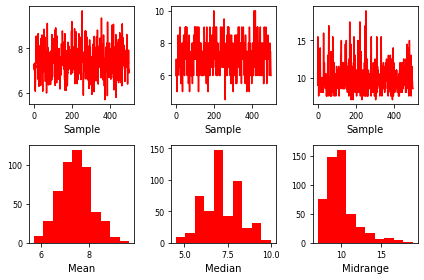

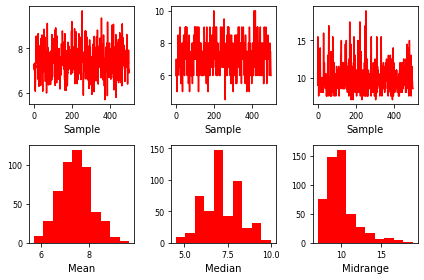

In [29]:
pd.plotting.bootstrap_plot(df[(df['CAR_AGE']<70) & (df['CAR_AGE']>-1) & df['STOLEN_INDIC']]['CAR_AGE'], color = 'r')

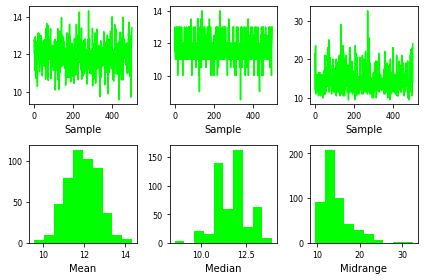

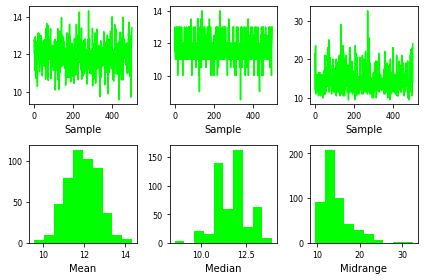

In [30]:
pd.plotting.bootstrap_plot(df[(df['CAR_AGE']<70) & (df['CAR_AGE']>-1) & ~(df['STOLEN_INDIC'])]['CAR_AGE'], color = 'lime')



From the bootstrapped results we can see that the mean and median age for stolen cars is 7.5 with high confidence. It is also interesting to see there is a bimodal median for the non-stolen cars at 11 and 12 thus reinforcing that the mean age for non-stolen cars centers heavily around 11 and 12 years old.

Also the 95% Confidence Interval for both bootstraps show there is statistical significance in the claim that non-stolen derelict cars are generally older than stolen derelict cars.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a6fb1c43-fd59-4bf9-b4b7-5bddb3f2c397' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>